#**CIS 5190 Final Project**

By: Ethan Ma, Eric Wang, Chung Un Lee (Richard)


# Sports Betting with ML
### Contribution 1:
In this first contribution, we will focus on collecting data and then using it to create our baseline models.

## Installations, Imports, and Set-Up:

In [25]:
!pip install pandasql

In [26]:
import csv
import pandas as pd
import numpy as np
import datetime as dt
import geopy.distance as gp
import matplotlib.image as mpimg
import plotly.express as px
import pandasql as ps #SQL on Pandas Dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Mount to Drive (need to sign-in to Google Account)

### Datasets

[Link to Drive](https://drive.google.com/drive/folders/1PdNkjqxJQytu9w2NpsDEIv6e0gmn1ZaZ?usp=sharing)

To run:
1: Download 23_players_reg_pergame, 23_win_loss_data, 23_players_reg_pergame as .csv files to your local Google Drive

In [27]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Import, Cleaning, and Processing

Load the dataset using Pandas.
Please download all .csv files found in the 'Google Colab Data' folder of this drive:
https://drive.google.com/drive/folders/1PdNkjqxJQytu9w2NpsDEIv6e0gmn1ZaZ?usp=sharing

In [28]:
# Initialize news_df using our downloaded csv
win_loss_df = pd.read_csv('/content/drive/MyDrive/23_win_loss_data.csv')
team_df = pd.read_csv('/content/drive/MyDrive/23_team_reg_pergame.csv')
player_df = pd.read_csv('/content/drive/MyDrive/23_players_reg_pergame.csv')
line_df = pd.read_csv('/content/drive/MyDrive/ROTOWIRE_data.csv')

In [29]:
# Show the first 10 rows of news_df
win_loss_df

,season,status,date,home_score,home_team,away_score,away_team,winner,loser
0,preseason,Final,"Oct 2, 22",96,Spurs,134,Rockets,Rockets,Spurs
1,preseason,Final,"Oct 2, 22",82,Jazz,114,Raptors,Raptors,Jazz
2,preseason,Final,"Oct 2, 22",93,Hornets,134,Celtics,Celtics,Hornets
3,preseason,Final,"Oct 2, 22",95,Wizards,104,Warriors,Warriors,Wizards
4,preseason,Final,"Oct 3, 22",97,Trail Blazers,102,Clippers,Clippers,Trail Blazers
...,...,...,...,...,...,...,...,...,...
1362,nba_finals,Final,"Jun 1, 23",104,Nuggets,93,Heat,Nuggets,Heat
1363,nba_finals,Final,"Jun 4, 23",111,Heat,108,Nuggets,Heat,Nuggets
1364,nba_finals,Final,"Jun 7, 23",94,Heat,109,Nuggets,Nuggets,Heat
1365,nba_finals,Final,"Jun 9, 23",95,Heat,108,Nuggets,Nuggets,Heat


In [30]:
team_df.head(10)

,RANK,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,1,Milwaukee Bucks,82,58,24,0.707,48.4,116.9,42.7,90.4,...,37.5,48.6,25.8,14.6,6.4,4.9,3.9,18.0,19.0,3.6
1,2,Boston Celtics,82,57,25,0.695,48.7,117.9,42.2,88.8,...,35.6,45.3,26.7,13.4,6.4,5.2,3.9,18.8,19.1,6.5
2,3,Philadelphia 76ers,82,54,28,0.659,48.5,115.2,40.8,83.8,...,32.2,40.9,25.2,13.7,7.7,4.7,4.6,20.4,19.6,4.3
3,4,Denver Nuggets,82,53,29,0.646,48.2,115.8,43.6,86.4,...,32.9,43.0,28.9,14.5,7.5,4.5,4.2,18.6,19.5,3.3
4,5,Cleveland Cavaliers,82,51,31,0.622,48.5,112.3,41.6,85.2,...,31.4,41.1,24.9,13.3,7.1,4.7,4.4,19.0,20.4,5.4
5,5,Memphis Grizzlies,82,51,31,0.622,48.2,116.9,43.7,92.1,...,34.6,46.6,26.0,13.6,8.3,5.8,5.2,20.0,20.0,3.9
6,7,Sacramento Kings,82,48,34,0.585,48.4,120.7,43.6,88.2,...,32.9,42.5,27.3,13.5,7.0,3.4,4.2,19.7,20.9,2.6
7,8,New York Knicks,82,47,35,0.573,48.7,116.0,42.0,89.4,...,34.0,46.6,22.9,13.0,6.4,4.1,4.5,20.3,20.7,2.9
8,9,Brooklyn Nets,82,45,37,0.549,48.1,113.4,41.5,85.1,...,32.3,40.5,25.5,13.7,7.1,6.2,3.9,21.1,18.5,0.9
9,9,Phoenix Suns,82,45,37,0.549,48.2,113.6,42.1,90.1,...,32.4,44.2,27.3,13.5,7.1,5.3,4.0,21.2,19.9,2.1


In [31]:
player_df.head(10)

,Rank,Player,Team,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1,Joel Embiid,PHI,66,34.6,33.1,11.0,20.1,54.8,1.0,...,11.7,85.7,1.7,8.4,10.2,4.2,1.0,1.7,3.4,35.9
1,2,Luka Doncic,DAL,66,36.2,32.4,10.9,22.0,49.6,2.8,...,10.5,74.2,0.8,7.8,8.6,8.0,1.4,0.5,3.6,33.5
2,3,Damian Lillard,POR,58,36.3,32.2,9.6,20.7,46.3,4.2,...,9.6,91.4,0.8,4.0,4.8,7.3,0.9,0.3,3.3,30.2
3,4,Shai Gilgeous-Alexander,OKC,68,35.5,31.4,10.4,20.3,51.0,0.9,...,10.9,90.5,0.9,4.0,4.8,5.5,1.6,1.0,2.8,30.5
4,5,Giannis Antetokounmpo,MIL,63,32.1,31.1,11.2,20.3,55.3,0.7,...,12.3,64.5,2.2,9.6,11.8,5.7,0.8,0.8,3.9,32.9
5,6,Jayson Tatum,BOS,74,36.9,30.1,9.8,21.1,46.6,3.2,...,8.4,85.4,1.1,7.7,8.8,4.6,1.1,0.7,2.9,29.9
6,7,Donovan Mitchell,CLE,68,35.8,28.3,10.0,20.6,48.4,3.6,...,5.4,86.7,0.9,3.3,4.3,4.4,1.5,0.4,2.6,24.8
7,8,Kyrie Irving,DAL,60,37.4,27.1,9.9,20.1,49.4,3.1,...,4.6,90.5,1.0,4.1,5.1,5.5,1.1,0.8,2.1,26.8
8,9,Jaylen Brown,BOS,67,35.9,26.6,10.1,20.6,49.1,2.4,...,5.1,76.5,1.2,5.7,6.9,3.5,1.1,0.4,2.9,23.8
9,10,Trae Young,ATL,73,34.8,26.2,8.2,19.0,42.9,2.1,...,8.8,88.6,0.8,2.2,3.0,10.2,1.1,0.1,4.1,24.6


Drop null values, any cleaning here

In [32]:
# TODO

# Cleaning Data and Creating Datasets

Import nltk modules

Create new column in ```news_df``` called **'cleaned_headlines'** that holds the cleaned headlines. To clean headlines, break each headline into tokens, have each token converted to lower case, only consider works that contain only letters, and filter out any stop words.

In [33]:
# Define function to change each team to its 3 letter abreviation
def convert_team(team):
  mapping = {
      'Hawks': 'ATL',
      'Celtics': 'BOS',
      'Nets': 'BKN',
      'Hornets': 'CHA',
      'Bulls': 'CHI',
      'Cavaliers': 'CLE',
      'Mavericks': 'DAL',
      'Nuggets': 'DEN',
      'Pistons': 'DET',
      'Warriors': 'GSW',
      'Rockets': 'HOU',
      'Pacers': 'IND',
      'Clippers': 'LAC',
      'Lakers': 'LAL',
      'Grizzlies': 'MEM',
      'Heat': 'MIA',
      'Bucks': 'MIL',
      'Timberwolves': 'MIN',
      'Pelicans': 'NOP',
      'Knicks': 'NYK',
      'Thunder': 'OKC',
      'Magic': 'ORL',
      '76ers': 'PHI',
      'Suns': 'PHX',
      'Blazers': 'POR',
      'Kings': 'SAC',
      'Spurs': 'SAS',
      'Raptors': 'TOR',
      'Jazz': 'UTA',
      'Wizards': 'WAS'
  }
  # remove regional location for team, only want the name
  if " " in team:
    team_name = team.split(' ')
    team = team_name[-1]
  return mapping[team] if team in mapping else team

Clean each dataset to have the same 3-letter team name format



In [34]:
# Apply above function to each row to convert team name
cleaned_win_loss_df = win_loss_df.astype({"home_team": "string", "away_team": "string", "winner": "string", "loser": "string"})

cleaned_win_loss_df['home_team'] = cleaned_win_loss_df['home_team'].apply(lambda x: convert_team(x))
cleaned_win_loss_df['away_team'] = cleaned_win_loss_df['away_team'].apply(lambda x: convert_team(x))
cleaned_win_loss_df['winner'] = cleaned_win_loss_df['winner'].apply(lambda x: convert_team(x))
cleaned_win_loss_df['loser'] = cleaned_win_loss_df['loser'].apply(lambda x: convert_team(x))

# create label, 1 if the home team won, 0 otherwise
def create_label(row):
  return 1 if row['home_team'] == row['winner'] else 0
cleaned_win_loss_df['label'] = cleaned_win_loss_df.apply(create_label, axis=1)


cleaned_win_loss_df.head(10)

,season,status,date,home_score,home_team,away_score,away_team,winner,loser,label
0,preseason,Final,"Oct 2, 22",96,SAS,134,HOU,HOU,SAS,0
1,preseason,Final,"Oct 2, 22",82,UTA,114,TOR,TOR,UTA,0
2,preseason,Final,"Oct 2, 22",93,CHA,134,BOS,BOS,CHA,0
3,preseason,Final,"Oct 2, 22",95,WAS,104,GSW,GSW,WAS,0
4,preseason,Final,"Oct 3, 22",97,POR,102,LAC,LAC,POR,0
5,preseason,Final,"Oct 3, 22",105,SAC,75,LAL,SAC,LAL,1
6,preseason,Final,"Oct 3, 22",112,OKC,101,DEN,OKC,DEN,1
7,preseason,Final,"Oct 3, 22",97,ORL,109,MEM,MEM,ORL,0
8,preseason,Final,"Oct 3, 22",127,PHI,108,BKN,PHI,BKN,1
9,preseason,Final,"Oct 4, 22",118,UTA,101,POR,UTA,POR,1


In [35]:
cleaned_team_df = team_df.astype({"TEAM": "string"})

cleaned_team_df['TEAM'] = cleaned_team_df['TEAM'].apply(lambda x: convert_team(x))
cleaned_team_df = cleaned_team_df.rename(columns={"Team": "TEAM", "3PM": "TPM", "3PA": "TPA"})
cleaned_team_df.head(10)

,RANK,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,1,MIL,82,58,24,0.707,48.4,116.9,42.7,90.4,...,37.5,48.6,25.8,14.6,6.4,4.9,3.9,18.0,19.0,3.6
1,2,BOS,82,57,25,0.695,48.7,117.9,42.2,88.8,...,35.6,45.3,26.7,13.4,6.4,5.2,3.9,18.8,19.1,6.5
2,3,PHI,82,54,28,0.659,48.5,115.2,40.8,83.8,...,32.2,40.9,25.2,13.7,7.7,4.7,4.6,20.4,19.6,4.3
3,4,DEN,82,53,29,0.646,48.2,115.8,43.6,86.4,...,32.9,43.0,28.9,14.5,7.5,4.5,4.2,18.6,19.5,3.3
4,5,CLE,82,51,31,0.622,48.5,112.3,41.6,85.2,...,31.4,41.1,24.9,13.3,7.1,4.7,4.4,19.0,20.4,5.4
5,5,MEM,82,51,31,0.622,48.2,116.9,43.7,92.1,...,34.6,46.6,26.0,13.6,8.3,5.8,5.2,20.0,20.0,3.9
6,7,SAC,82,48,34,0.585,48.4,120.7,43.6,88.2,...,32.9,42.5,27.3,13.5,7.0,3.4,4.2,19.7,20.9,2.6
7,8,NYK,82,47,35,0.573,48.7,116.0,42.0,89.4,...,34.0,46.6,22.9,13.0,6.4,4.1,4.5,20.3,20.7,2.9
8,9,BKN,82,45,37,0.549,48.1,113.4,41.5,85.1,...,32.3,40.5,25.5,13.7,7.1,6.2,3.9,21.1,18.5,0.9
9,9,PHX,82,45,37,0.549,48.2,113.6,42.1,90.1,...,32.4,44.2,27.3,13.5,7.1,5.3,4.0,21.2,19.9,2.1


In [36]:
cleaned_player_df = player_df.astype({"Team": "string"})
cleaned_player_df = cleaned_player_df.rename(columns={"Team": "TEAM", "3PM": "TPM", "3PA": "TPA"})
cleaned_player_df.head(10)

,Rank,Player,TEAM,GP,MIN,PTS,FGM,FGA,FG%,TPM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1,Joel Embiid,PHI,66,34.6,33.1,11.0,20.1,54.8,1.0,...,11.7,85.7,1.7,8.4,10.2,4.2,1.0,1.7,3.4,35.9
1,2,Luka Doncic,DAL,66,36.2,32.4,10.9,22.0,49.6,2.8,...,10.5,74.2,0.8,7.8,8.6,8.0,1.4,0.5,3.6,33.5
2,3,Damian Lillard,POR,58,36.3,32.2,9.6,20.7,46.3,4.2,...,9.6,91.4,0.8,4.0,4.8,7.3,0.9,0.3,3.3,30.2
3,4,Shai Gilgeous-Alexander,OKC,68,35.5,31.4,10.4,20.3,51.0,0.9,...,10.9,90.5,0.9,4.0,4.8,5.5,1.6,1.0,2.8,30.5
4,5,Giannis Antetokounmpo,MIL,63,32.1,31.1,11.2,20.3,55.3,0.7,...,12.3,64.5,2.2,9.6,11.8,5.7,0.8,0.8,3.9,32.9
5,6,Jayson Tatum,BOS,74,36.9,30.1,9.8,21.1,46.6,3.2,...,8.4,85.4,1.1,7.7,8.8,4.6,1.1,0.7,2.9,29.9
6,7,Donovan Mitchell,CLE,68,35.8,28.3,10.0,20.6,48.4,3.6,...,5.4,86.7,0.9,3.3,4.3,4.4,1.5,0.4,2.6,24.8
7,8,Kyrie Irving,DAL,60,37.4,27.1,9.9,20.1,49.4,3.1,...,4.6,90.5,1.0,4.1,5.1,5.5,1.1,0.8,2.1,26.8
8,9,Jaylen Brown,BOS,67,35.9,26.6,10.1,20.6,49.1,2.4,...,5.1,76.5,1.2,5.7,6.9,3.5,1.1,0.4,2.9,23.8
9,10,Trae Young,ATL,73,34.8,26.2,8.2,19.0,42.9,2.1,...,8.8,88.6,0.8,2.2,3.0,10.2,1.1,0.1,4.1,24.6


In [37]:
cleaned_player_df = cleaned_player_df.drop(columns=['Player'])
cleaned_player_df

,Rank,TEAM,GP,MIN,PTS,FGM,FGA,FG%,TPM,TPA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1,PHI,66,34.6,33.1,11.0,20.1,54.8,1.0,3.0,...,11.7,85.7,1.7,8.4,10.2,4.2,1.0,1.7,3.4,35.9
1,2,DAL,66,36.2,32.4,10.9,22.0,49.6,2.8,8.2,...,10.5,74.2,0.8,7.8,8.6,8.0,1.4,0.5,3.6,33.5
2,3,POR,58,36.3,32.2,9.6,20.7,46.3,4.2,11.3,...,9.6,91.4,0.8,4.0,4.8,7.3,0.9,0.3,3.3,30.2
3,4,OKC,68,35.5,31.4,10.4,20.3,51.0,0.9,2.5,...,10.9,90.5,0.9,4.0,4.8,5.5,1.6,1.0,2.8,30.5
4,5,MIL,63,32.1,31.1,11.2,20.3,55.3,0.7,2.7,...,12.3,64.5,2.2,9.6,11.8,5.7,0.8,0.8,3.9,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,241,PHI,75,25.6,3.5,1.3,3.0,42.7,0.7,1.9,...,0.3,82.6,1.3,2.7,3.9,0.8,0.5,0.2,0.6,6.6
241,242,NYK,64,11.9,3.5,1.2,3.4,35.8,0.6,2.1,...,0.7,66.7,0.2,0.6,0.8,1.1,0.6,0.1,0.4,3.3
242,243,WAS,59,10.6,3.3,1.2,2.2,53.8,0.1,0.5,...,1.1,73.1,0.6,1.1,1.7,0.6,0.1,0.2,0.3,4.3
243,244,TOR,58,13.8,3.1,1.2,2.6,48.0,0.0,0.2,...,1.0,62.7,1.4,1.5,2.9,0.5,0.4,1.0,0.3,5.9


In [38]:
# create label, 1 if the home team won, 0 otherwise
def create_label(row):
  return 1 if row['home_score'] > row['away_score'] else 0

cleaned_line_df = line_df
cleaned_line_df['label'] = cleaned_line_df.apply(create_label, axis=1)

# let's only consider 2023 data for now
cleaned_line_df = cleaned_line_df[cleaned_line_df['season'] == 2022]
# again get rid of scores, since this would not be available until after the game is over
# SHOULD NOT TAKE LABEL OFF, THINK ABT THIS MORE

In [39]:
# List of columns to keep for aggregation
columns_to_keep = ['MIN', 'PTS', 'FGM', 'FGA', 'FG%', 'TPM', 'TPA', '3P%',
                   'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL',
                   'BLK', 'TOV', 'EFF']

sorted_df = cleaned_player_df.sort_values(by=['TEAM', 'Rank'], ascending=[True, False])

# Group by 'TEAM' and take the top 3 players for each team
top_3_players = sorted_df.groupby('TEAM').head(3)

# Group the top 3 players DataFrame by 'TEAM' and calculate the mean for the specified columns
player_avg_df = top_3_players.groupby('TEAM')[columns_to_keep].mean()


new_column_names = ['p_' + col for col in columns_to_keep]

# Rename the columns in the DataFrame
player_avg_df.columns = new_column_names


# Print the aggregated DataFrame
player_avg_df.head(10)

,p_MIN,p_PTS,p_FGM,p_FGA,p_FG%,p_TPM,p_TPA,p_3P%,p_FTM,p_FTA,p_FT%,p_OREB,p_DREB,p_REB,p_AST,p_STL,p_BLK,p_TOV,p_EFF
TEAM,,,,,,,,,,,,,,,,,,,
ATL,15.933333,6.133333,2.400000,5.166667,45.800000,0.800000,2.166667,36.233333,0.566667,0.766667,78.866667,0.533333,1.900000,2.433333,1.200000,0.566667,0.300000,0.600000,7.100000
BKN,22.333333,7.166667,2.566667,5.833333,44.633333,1.533333,3.966667,40.233333,0.500000,0.700000,70.966667,0.833333,2.300000,3.133333,1.233333,0.566667,0.333333,0.633333,8.366667
BOS,14.266667,5.433333,2.000000,4.033333,52.300000,1.033333,2.566667,34.666667,0.433333,0.533333,76.533333,0.733333,2.100000,2.900000,0.833333,0.266667,0.466667,0.400000,7.266667
CHA,21.766667,9.233333,3.433333,7.200000,49.066667,0.866667,2.566667,55.500000,1.433333,1.966667,72.700000,1.266667,3.233333,4.500000,1.166667,0.466667,0.833333,1.000000,10.900000
CHI,16.733333,5.533333,2.066667,4.000000,52.033333,0.400000,1.200000,23.400000,0.966667,1.433333,69.400000,1.200000,2.800000,3.966667,1.300000,0.900000,0.566667,0.866667,8.966667
CLE,20.000000,6.800000,2.500000,5.400000,46.433333,0.933333,2.633333,35.033333,0.866667,1.233333,71.766667,0.600000,2.133333,2.700000,1.033333,0.533333,0.266667,0.566667,7.566667
DAL,25.066667,7.666667,2.833333,5.300000,55.933333,1.000000,2.666667,26.066667,0.966667,1.433333,69.766667,1.100000,2.500000,3.566667,1.333333,0.666667,0.200000,0.866667,9.700000
DEN,16.200000,6.500000,2.533333,4.633333,53.133333,0.500000,1.400000,38.966667,0.900000,1.200000,76.333333,0.833333,2.600000,3.400000,0.866667,0.400000,0.300000,0.566667,8.566667
DET,24.333333,8.766667,3.433333,7.433333,48.400000,0.733333,2.233333,22.300000,1.166667,1.666667,74.133333,1.366667,3.133333,4.500000,3.600000,0.866667,0.466667,1.533333,12.200000


Create joined dataframe

Drop Unecessary/Redundant Columns

In [40]:
cleaned_win_loss_df = cleaned_win_loss_df.drop(columns=['status', 'winner', 'loser', 'home_score', 'away_score']) # scores won't be available when predicting games before actual matchup
cleaned_win_loss_df

,season,date,home_team,away_team,label
0,preseason,"Oct 2, 22",SAS,HOU,0
1,preseason,"Oct 2, 22",UTA,TOR,0
2,preseason,"Oct 2, 22",CHA,BOS,0
3,preseason,"Oct 2, 22",WAS,GSW,0
4,preseason,"Oct 3, 22",POR,LAC,0
...,...,...,...,...,...
1362,nba_finals,"Jun 1, 23",DEN,MIA,1
1363,nba_finals,"Jun 4, 23",MIA,DEN,1
1364,nba_finals,"Jun 7, 23",MIA,DEN,0
1365,nba_finals,"Jun 9, 23",MIA,DEN,0


In [41]:
# cross join all team stats
cross_query = """
SELECT T1.TEAM AS home_team, T2.TEAM AS away_team, T1.W - T2.w AS W, T1.PTS - T2.PTS AS PTS, T1.FGM - T2.FGM AS FGM, T1.FGA - T2.FGA AS FGA, T1.TPA - T2.TPA AS TPA, T1.TPM - T2.TPM AS TPM, T1.FTM - T2.FTM AS FTM, T1.FTA - T2.FTA AS FTA, T1.OREB - T2.OREB AS OREB, T1.DREB - T2.DREB AS DREB, T1.REB - T2.REB AS REB, T1.AST - T2.AST AS AST, T1.TOV - T2.TOV AS TOV, T1.STL - T2.STL AS STL, T1.BLK - T2.BLK AS BLK, T1.BLKA - T2.BLKA AS BLKA, T1.PF - T2.PF AS PF, T1.PFD - T2.PFD AS PFD
FROM cleaned_team_df T1 CROSS JOIN cleaned_team_df T2
WHERE NOT T1.TEAM=T2.TEAM
"""
cross_df = ps.sqldf(cross_query, locals())
cross_df

,home_team,away_team,W,PTS,FGM,FGA,TPA,TPM,FTM,FTA,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
0,MIL,BOS,1,-1.0,0.5,1.6,-2.3,-1.2,-0.9,0.8,1.4,1.9,3.3,-0.9,1.2,0.0,-0.3,0.0,-0.8,-0.1
1,MIL,PHI,4,1.7,1.9,6.6,7.7,2.2,-4.4,-2.7,2.4,5.3,7.7,0.6,0.9,-1.3,0.2,-0.7,-2.4,-0.6
2,MIL,DEN,5,1.1,-0.9,4.0,9.1,3.0,-0.2,0.0,1.0,4.6,5.6,-3.1,0.1,-1.1,0.4,-0.3,-0.6,-0.5
3,MIL,CLE,7,4.6,1.1,5.2,8.7,3.2,-0.9,-0.1,1.4,6.1,7.5,0.9,1.3,-0.7,0.2,-0.5,-1.0,-1.4
4,MIL,MEM,7,0.0,-1.0,-1.7,6.1,2.8,-0.9,-1.4,-0.9,2.9,2.0,-0.2,1.0,-1.9,-0.9,-1.3,-2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,DET,ORL,-17,-1.1,-0.9,0.8,1.3,0.6,0.2,0.7,1.0,-1.8,-0.8,-0.2,0.0,-0.4,-0.9,0.4,2.0,0.5
866,DET,POR,-16,-3.1,-0.9,1.7,-2.9,-1.5,0.2,1.1,1.8,0.2,1.9,-1.2,0.6,0.3,-0.8,1.2,2.1,0.5
867,DET,CHA,-10,-0.7,-1.7,-3.3,-0.1,0.7,2.2,2.1,0.2,-2.2,-2.1,-2.1,0.9,-0.7,-1.4,-0.2,1.8,0.7
868,DET,HOU,-5,-0.4,-1.0,-1.8,0.5,1.0,0.7,0.4,-2.2,-1.6,-3.9,0.6,-1.1,-0.3,-0.8,-0.7,1.6,0.4


In [42]:
# cross all player average stats
player_cross_query = """
SELECT T1.TEAM AS home_team, T2.TEAM AS away_team, T1.p_PTS - T2.p_PTS AS p_PTS, T1.p_FGM - T2.p_FGM AS p_FGM, T1.p_FGA - T2.p_FGA AS p_FGA, T1.p_TPA - T2.p_TPA AS p_TPA, T1.p_TPM - T2.p_TPM AS p_TPM, T1.p_FTM - T2.p_FTM AS p_FTM, T1.p_FTA - T2.p_FTA AS p_FTA, T1.p_OREB - T2.p_OREB AS p_OREB, T1.p_DREB - T2.p_DREB AS p_DREB, T1.p_REB - T2.p_REB AS p_REB, T1.p_AST - T2.p_AST AS p_AST, T1.p_TOV - T2.p_TOV AS p_TOV, T1.p_STL - T2.p_STL AS p_STL, T1.p_BLK - T2.p_BLK AS p_BLK
FROM player_avg_df T1 CROSS JOIN player_avg_df T2
WHERE NOT T1.TEAM=T2.TEAM
"""
player_cross_df = ps.sqldf(player_cross_query, locals())
cross_df

,home_team,away_team,W,PTS,FGM,FGA,TPA,TPM,FTM,FTA,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
0,MIL,BOS,1,-1.0,0.5,1.6,-2.3,-1.2,-0.9,0.8,1.4,1.9,3.3,-0.9,1.2,0.0,-0.3,0.0,-0.8,-0.1
1,MIL,PHI,4,1.7,1.9,6.6,7.7,2.2,-4.4,-2.7,2.4,5.3,7.7,0.6,0.9,-1.3,0.2,-0.7,-2.4,-0.6
2,MIL,DEN,5,1.1,-0.9,4.0,9.1,3.0,-0.2,0.0,1.0,4.6,5.6,-3.1,0.1,-1.1,0.4,-0.3,-0.6,-0.5
3,MIL,CLE,7,4.6,1.1,5.2,8.7,3.2,-0.9,-0.1,1.4,6.1,7.5,0.9,1.3,-0.7,0.2,-0.5,-1.0,-1.4
4,MIL,MEM,7,0.0,-1.0,-1.7,6.1,2.8,-0.9,-1.4,-0.9,2.9,2.0,-0.2,1.0,-1.9,-0.9,-1.3,-2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,DET,ORL,-17,-1.1,-0.9,0.8,1.3,0.6,0.2,0.7,1.0,-1.8,-0.8,-0.2,0.0,-0.4,-0.9,0.4,2.0,0.5
866,DET,POR,-16,-3.1,-0.9,1.7,-2.9,-1.5,0.2,1.1,1.8,0.2,1.9,-1.2,0.6,0.3,-0.8,1.2,2.1,0.5
867,DET,CHA,-10,-0.7,-1.7,-3.3,-0.1,0.7,2.2,2.1,0.2,-2.2,-2.1,-2.1,0.9,-0.7,-1.4,-0.2,1.8,0.7
868,DET,HOU,-5,-0.4,-1.0,-1.8,0.5,1.0,0.7,0.4,-2.2,-1.6,-3.9,0.6,-1.1,-0.3,-0.8,-0.7,1.6,0.4


In [120]:
join_query = """
SELECT DISTINCT label, home_line, tipoff, away_score, home_score, W.home_team, W.away_team, W, PTS, FGM, FGA, TPA, TPM, FTM,
       FTA, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF,
       PFD, season
FROM cross_df C JOIN cleaned_line_df W ON C.home_team = W.home_team AND C.away_team = W.away_team

"""
joined_df = ps.sqldf(join_query, locals())
joined_df
print(joined_df.columns)

Index(['label', 'home_line', 'tipoff', 'away_score', 'home_score', 'home_team',
       'away_team', 'W', 'PTS', 'FGM', 'FGA', 'TPA', 'TPM', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'season'],
      dtype='object')


In [121]:
# join2_query = """
# SELECT DISTINCT W.home_team, W.away_team, W, PTS, FGM, FGA, TPA, TPM, FTM,
#        FTA, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF,
#        PFD, season, date, label
# FROM cross_df C JOIN cleaned_win_loss_df W ON C.home_team = W.home_team AND C.away_team = W.away_team

# """
join2_query = """
SELECT *
FROM player_cross_df C JOIN joined_df W ON C.home_team = W.home_team AND C.away_team = W.away_team

"""
joined2_df = ps.sqldf(join2_query, locals())
joined2_df.head()
# print(joined2_df.columns)

,home_team,away_team,p_PTS,p_FGM,p_FGA,p_TPA,p_TPM,p_FTM,p_FTA,p_OREB,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,season
0,ATL,BKN,-1.033333,-0.166667,-0.666667,-1.8,-0.733333,0.066667,0.066667,-0.3,...,0.9,3.9,-0.5,-0.8,0.0,-1.3,1.1,-2.3,1.2,2022
1,ATL,BKN,-1.033333,-0.166667,-0.666667,-1.8,-0.733333,0.066667,0.066667,-0.3,...,0.9,3.9,-0.5,-0.8,0.0,-1.3,1.1,-2.3,1.2,2022
2,ATL,BOS,0.700000,0.400000,1.133333,-0.4,-0.233333,0.133333,0.233333,-0.2,...,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6,2022
3,ATL,BOS,0.700000,0.400000,1.133333,-0.4,-0.233333,0.133333,0.233333,-0.2,...,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6,2022
4,ATL,BOS,0.700000,0.400000,1.133333,-0.4,-0.233333,0.133333,0.233333,-0.2,...,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6,2022


In [122]:
player_query = """
SELECT *
FROM joined_df j JOIN cleaned_player_df p ON j.home_team = p.TEAM
"""
joined_player_df = ps.sqldf(player_query, locals())
joined_player_df

print("Columns in joined_player_df:", joined_player_df.columns)

Columns in joined_player_df: Index(['label', 'home_line', 'tipoff', 'away_score', 'home_score', 'home_team',
       'away_team', 'W', 'PTS', 'FGM', 'FGA', 'TPA', 'TPM', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'season', 'Rank', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       'TPM', 'TPA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'EFF'],
      dtype='object')


In [123]:
final_df = joined2_df.drop(columns=['W', 'season', 'home_team', 'away_team'])
# final_df = joined2_df.drop(columns=['W', 'season', 'date', 'home_team', 'away_team', 'TEAM'])
final_df

,p_PTS,p_FGM,p_FGA,p_TPA,p_TPM,p_FTM,p_FTA,p_OREB,p_DREB,p_REB,...,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
0,-1.033333,-0.166667,-0.666667,-1.800000,-0.733333,0.066667,0.066667,-3.000000e-01,-0.400000,-0.700000,...,3.0,0.9,3.9,-0.5,-0.8,0.0,-1.3,1.1,-2.3,1.2
1,-1.033333,-0.166667,-0.666667,-1.800000,-0.733333,0.066667,0.066667,-3.000000e-01,-0.400000,-0.700000,...,3.0,0.9,3.9,-0.5,-0.8,0.0,-1.3,1.1,-2.3,1.2
2,0.700000,0.400000,1.133333,-0.400000,-0.233333,0.133333,0.233333,-2.000000e-01,-0.200000,-0.466667,...,1.5,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6
3,0.700000,0.400000,1.133333,-0.400000,-0.233333,0.133333,0.233333,-2.000000e-01,-0.200000,-0.466667,...,1.5,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6
4,0.700000,0.400000,1.133333,-0.400000,-0.233333,0.133333,0.233333,-2.000000e-01,-0.200000,-0.466667,...,1.5,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-0.066667,-0.100000,0.100000,-0.433333,-0.166667,0.200000,0.200000,1.666667e-01,-0.166667,0.033333,...,-0.1,1.3,1.1,-1.9,0.6,-0.2,1.8,0.8,-0.9,-1.5
1308,-3.433333,-1.133333,-2.600000,-1.666667,-0.600000,-0.600000,-0.766667,-1.110223e-16,-0.533333,-0.500000,...,-2.4,2.3,-0.1,-1.8,-1.2,-0.2,1.3,-0.3,-1.1,0.9
1309,-2.666667,-1.200000,-1.300000,0.966667,0.333333,-0.600000,-1.066667,-1.700000e+00,-2.000000,-3.633333,...,-3.3,3.9,0.6,1.5,2.4,-2.6,0.0,0.4,-1.2,-0.2
1310,-2.666667,-1.200000,-1.300000,0.966667,0.333333,-0.600000,-1.066667,-1.700000e+00,-2.000000,-3.633333,...,-3.3,3.9,0.6,1.5,2.4,-2.6,0.0,0.4,-1.2,-0.2


# Creating Test/Training Datasets

First, we use sklearn's ```train_test_split``` to split from the ```cleaned_news_df``` into training and testing sets.



In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Create features from all except label
features = final_df.drop(columns='label')

# Extract target from the label
target = final_df['label']

# Set seed to 42, then perform the train test split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = seed, test_size = 0.2)

# Scale data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# x_test = scaler.transform(X_test)

## Logistic Regression Model (sklearn)



###Section 3.3.1 The Base Model

WRITE DESCRIPTION HERE

In [111]:
# Import our logistic regression module from sklearn
from sklearn.linear_model import LogisticRegression

In [112]:
# Set seed to 42, then initialize and fit our model
seed = 42
logR = LogisticRegression(max_iter=10000)

logR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [113]:
from sklearn.metrics import accuracy_score

# With our newly fitted model, predict on both training and testing data
y_pred = logR.predict(X_test)
y_pred_train = logR.predict(X_train)

lr_test_accuracy = accuracy_score(y_pred, y_test)
lr_train_accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy of train Logistic Classifier: %.1f%%"% (lr_train_accuracy*100))
print("Accuracy of test Logistic Classifier: %.1f%%"% (lr_test_accuracy*100))

Accuracy of train Logistic Classifier: 66.6%
Accuracy of test Logistic Classifier: 66.4%


In [114]:
logR.predict_proba(X_train)

array([[0.48894869, 0.51105131],
       [0.54446018, 0.45553982],
       [0.87170653, 0.12829347],
       ...,
       [0.65402884, 0.34597116],
       [0.35245854, 0.64754146],
       [0.24082238, 0.75917762]])

### Analysis of Feature Importances
TODO

In [115]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


pca = PCA(n_components=len(features.columns))
X_pca = pca.fit_transform(features)

rf_pca = RandomForestClassifier(n_estimators=100,
                                max_depth=6,
                                random_state=seed,
                                class_weight='balanced')
rf_pca.fit(X_pca, target)

importances = rf_pca.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

top_features_indices = sorted_indices[:10]
top_features = features.columns[top_features_indices]

print("Top Features by Importance:")
for feature, importance in zip(top_features, importances[top_features_indices]):
    print(f"{feature}: {importance:.4f}")


Top Features by Importance:
p_PTS: 0.1760
p_FGM: 0.0767
p_FGA: 0.0523
FTM: 0.0336
p_STL: 0.0311
p_TPM: 0.0306
p_TOV: 0.0301
p_AST: 0.0295
home_line: 0.0293
p_FTA: 0.0292


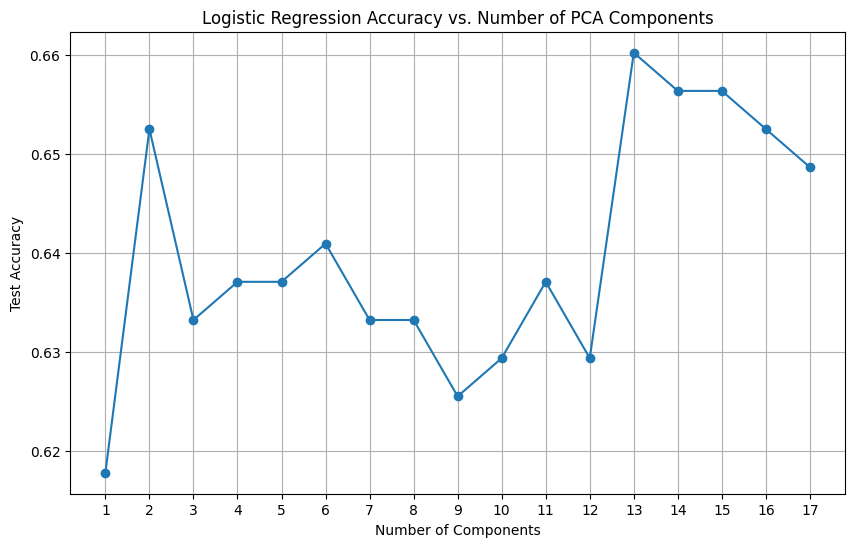

In [116]:

import matplotlib.pyplot as plt


component_values = []
test_accuracies = []

for n_components in range(1, 18):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    seed = 42
    log_pca = LogisticRegression(max_iter=10000)
    log_pca.fit(X_train_pca, y_train)

    y_pred_pca = log_pca.predict(X_test_pca)

    test_accuracy_pca = accuracy_score(y_test, y_pred_pca)

    component_values.append(n_components)
    test_accuracies.append(test_accuracy_pca)

plt.figure(figsize=(10, 6))
plt.plot(component_values, test_accuracies, marker='o')
plt.title('Logistic Regression Accuracy vs. Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.xticks(component_values)
plt.grid(True)
plt.show()

## Random Forest Classifier Model

ADD DESCRIPTION

In [117]:
# Import all modules for random forest classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [118]:
# Setting seed to 42, initialize our Random Forest Classifier
seed = 42
rf = RandomForestClassifier(n_estimators=250,
                            max_depth=2,
                            random_state=seed)

# Fit the classifier on our dataset
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=250, random_state=42)

In [119]:
# Find accuracies for both training and test data
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_pred, y_test)

print("Training Accuracy of Random Forest Classifier: %.1f%%"% (train_accuracy*100))
print("Testing Accuracy of Random Forest Classifier: %.1f%%"% (test_accuracy*100))

Training Accuracy of Random Forest Classifier: 67.1%
Testing Accuracy of Random Forest Classifier: 62.2%


Using model for different season data

Save our final dataframe to .csv file

In [124]:
from google.colab import files

final_df.to_csv('combinedData.csv', encoding = 'utf-8-sig')
files.download('combinedData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [125]:
joined_df.to_csv('combinedDataWithTeams.csv', encoding = 'utf-8-sig')
files.download('combinedDataWithTeams.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>